In [8]:
# 📁 ЗАГРУЗКА ДАННЫХ И ИМПОРТ КЛАССОВ
import sys
import os

# Добавляем папку src в путь для импорта
sys.path.append(os.path.abspath('../src'))

from utils.data_loader import DataLoader
from analysis.car_analysis import CarSalesAnalysis
from visualization.car_charts import CarCharts

# Загрузка данных
loader = DataLoader()
df = loader.load_data('../docs/raw/BMW sales data (2010-2024) (1) (1).csv')

print(f"✅ Загружено данных: {df.shape}")
print(f"📊 Колонки: {list(df.columns)}")

# Создаем анализатор
analyzer = CarSalesAnalysis(df)

📁 Загружаем данные из: ../docs/raw/BMW sales data (2010-2024) (1) (1).csv
✅ Загружено данных: (50000, 11)
📊 Колонки: ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']


In [9]:
# 🔍 БАЗОВАЯ ИНФОРМАЦИЯ (используем метод класса)
print("🔍 БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ")
print("=" * 40)

# Используем метод basic_info из CarSalesAnalysis
analyzer.basic_info()

print("\n" + "="*40)
print("ПЕРВЫЕ 5 СТРОК ДАННЫХ:")
display(df.head())

🔍 БАЗОВАЯ ИНФОРМАЦИЯ О ДАННЫХ
📊 БАЗОВАЯ ИНФОРМАЦИЯ:
Размер данных: (50000, 11)
Столбцы: ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']

Типы данных:
Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color        

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [10]:
# 🧹 ОЧИСТКА ДАННЫХ
print("🧹 ОЧИСТКА ДАННЫХ")
print("=" * 30)

print("До очистки:")
print(f"Размер: {df.shape}")
print(f"Дубликаты: {df.duplicated().sum()}")

# Очищаем данные
df_clean = loader.clean_data(df)

print("\nПосле очистки:")
print(f"Размер: {df_clean.shape}")
print(f"Дубликаты: {df_clean.duplicated().sum()}")
print(f"Пропуски: {df_clean.isnull().sum().sum()}")

# Обновляем анализатор с очищенными данными
analyzer_clean = CarSalesAnalysis(df_clean)

🧹 ОЧИСТКА ДАННЫХ
До очистки:
Размер: (50000, 11)
Дубликаты: 0

После очистки:
Размер: (50000, 11)
Дубликаты: 0
Пропуски: 0


📈 АНАЛИЗ МОДЕЛЕЙ BMW
🏆 ТОП-10 МОДЕЛЕЙ ПО ПРОДАЖАМ:


,Sales_Volume,Price_USD,Year
Model,,,
7 Series,23786466,75570.196742,2017.083369
i8,23423891,75366.270951,2016.939210
X1,23406060,75262.219037,2016.917724
3 Series,23281303,75566.233950,2017.007399
i3,23133849,74800.268081,2016.948029
5 Series,23097519,75287.844077,2017.018510
M5,22779688,74474.930996,2017.038187
X3,22745529,75016.616856,2017.027796
X5,22709749,74708.116782,2016.969913



🔍 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА ПО МОДЕЛЯМ:
Всего уникальных моделей: 11
Самая дорогая модель: 7 Series ($75,570.20)
Самая популярная модель: 7 Series (23786466.0 продаж)


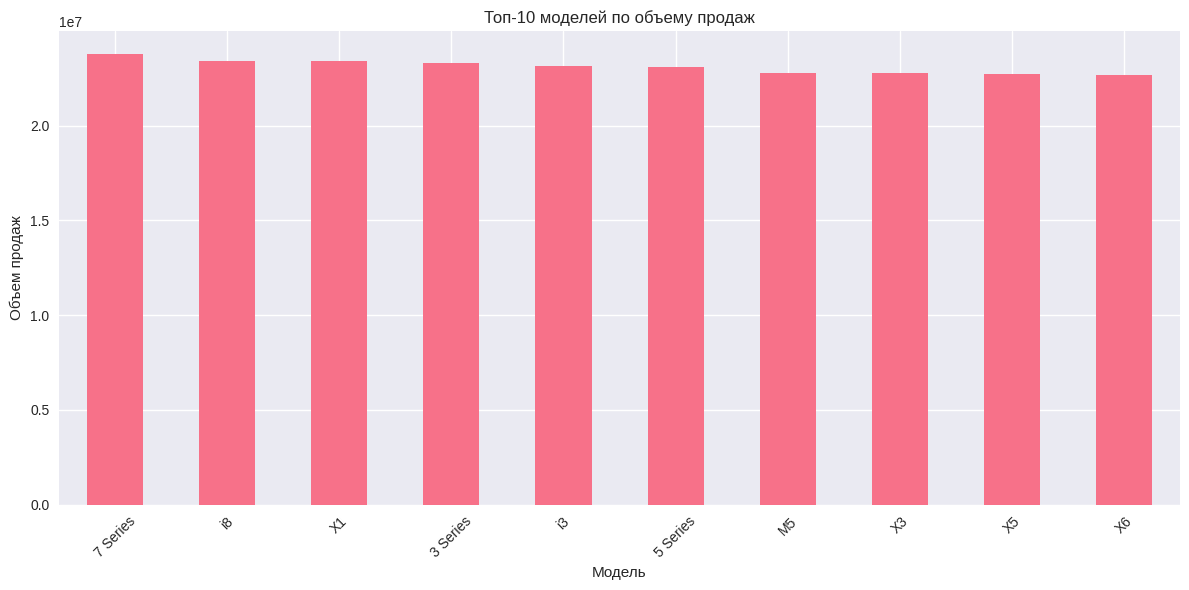

In [11]:
# 📈 АНАЛИЗ МОДЕЛЕЙ BMW (используем метод sales_by_model)
print("📈 АНАЛИЗ МОДЕЛЕЙ BMW")
print("=" * 30)

# Используем метод sales_by_model из CarSalesAnalysis
top_models = analyzer_clean.sales_by_model(10)
print("🏆 ТОП-10 МОДЕЛЕЙ ПО ПРОДАЖАМ:")
display(top_models)

# Дополнительный анализ моделей
print("\n🔍 ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА ПО МОДЕЛЯМ:")
print(f"Всего уникальных моделей: {df_clean['Model'].nunique()}")
print(f"Самая дорогая модель: {top_models['Price_USD'].idxmax()} (${top_models['Price_USD'].max():,.2f})")
print(f"Самая популярная модель: {top_models.index[0]} ({top_models.iloc[0]['Sales_Volume']} продаж)")

# Визуализация через CarCharts
charts = CarCharts(df_clean)
charts.plot_sales_by_model(10)

🌍 АНАЛИЗ ПО РЕГИОНАМ
АНАЛИЗ ПРОДАЖ ПО РЕГИОНАМ:


,Sales_Volume,Price_USD,Model
Region,,,
Asia,42974277,75554.925006,8454
Europe,42555138,74988.356851,8334
North America,42402629,75070.054709,8335
Middle East,42326620,74726.788487,8373
Africa,41565252,74885.771598,8253
South America,41551818,74973.598837,8251



🎯 КЛЮЧЕВЫЕ МЕТРИКИ ПО РЕГИОНАМ:
Всего регионов: 6
Самый прибыльный регион: Asia ($75,554.93)
Регион с наибольшим разнообразием моделей: Asia (8454 моделей)


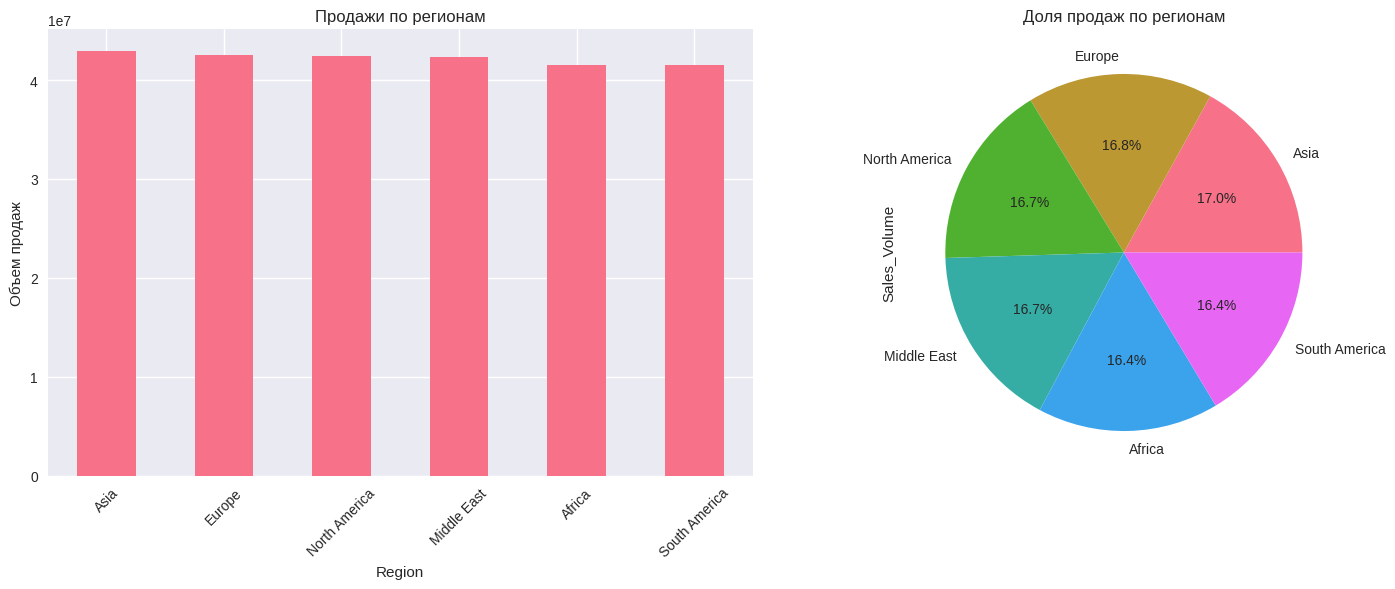

In [13]:
# 🌍 ГЕОГРАФИЧЕСКИЙ АНАЛИЗ
print("🌍 АНАЛИЗ ПО РЕГИОНАМ")
print("=" * 30)

regional_analysis = analyzer_clean.regional_analysis()
print("АНАЛИЗ ПРОДАЖ ПО РЕГИОНАМ:")
display(regional_analysis)

print("\n🎯 КЛЮЧЕВЫЕ МЕТРИКИ ПО РЕГИОНАМ:")
print(f"Всего регионов: {len(regional_analysis)}")
print(f"Самый прибыльный регион: {regional_analysis['Price_USD'].idxmax()} (${regional_analysis['Price_USD'].max():,.2f})")

# Используем 'Model' вместо 'Number_of_Models'
print(f"Регион с наибольшим разнообразием моделей: {regional_analysis['Model'].idxmax()} ({regional_analysis['Model'].max()} моделей)")

# Визуализация
charts.plot_regional_sales()

💰 АНАЛИЗ ЦЕНООБРАЗОВАНИЯ
📊 БАЗОВАЯ ИНФОРМАЦИЯ:
Размер данных: (50000, 11)
Столбцы: ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume', 'Sales_Classification']

Типы данных:
Model                    object
Year                      int64
Region                   object
Color                    object
Fuel_Type                object
Transmission             object
Engine_Size_L           float64
Mileage_KM                int64
Price_USD                 int64
Sales_Volume              int64
Sales_Classification     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color             

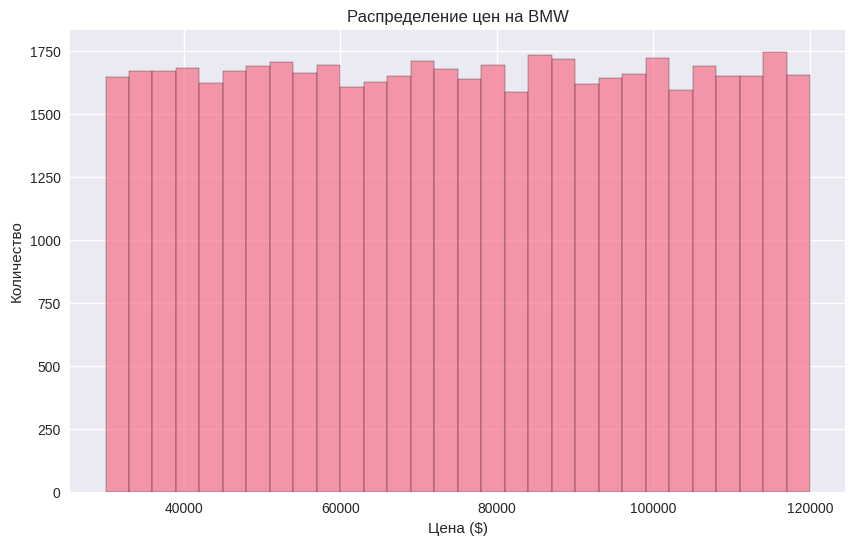

In [14]:
# 💰 АНАЛИЗ ЦЕН
print("💰 АНАЛИЗ ЦЕНООБРАЗОВАНИЯ")
print("=" * 30)

# Используем basic_info для общей информации
analyzer_clean.basic_info()

print("\n📊 СТАТИСТИКА ЦЕН:")
price_stats = df_clean['Price_USD'].describe()
print(f"• Средняя цена: ${price_stats['mean']:,.2f}")
print(f"• Медианная цена: ${price_stats['50%']:,.2f}")
print(f"• Минимальная цена: ${price_stats['min']:,.2f}")
print(f"• Максимальная цена: ${price_stats['max']:,.2f}")
print(f"• Стандартное отклонение: ${price_stats['std']:,.2f}")

# Визуализация распределения цен
charts.plot_price_distribution()

📅 ДИНАМИКА ПРОДАЖ И ЦЕН ПО ГОДАМ
ДИНАМИКА ПО ГОДАМ:


,Sales_Volume,Price_USD,Model
Year,,,
2010,16933445,75072.22,11
2011,16758941,75293.28,11
2012,16751895,75019.57,11
2013,16866733,74535.91,11
2014,16958960,74556.54,11
2015,17010207,74049.55,11
2016,16957550,75543.54,11
2017,16620811,75173.15,11
2018,16412273,75455.48,11


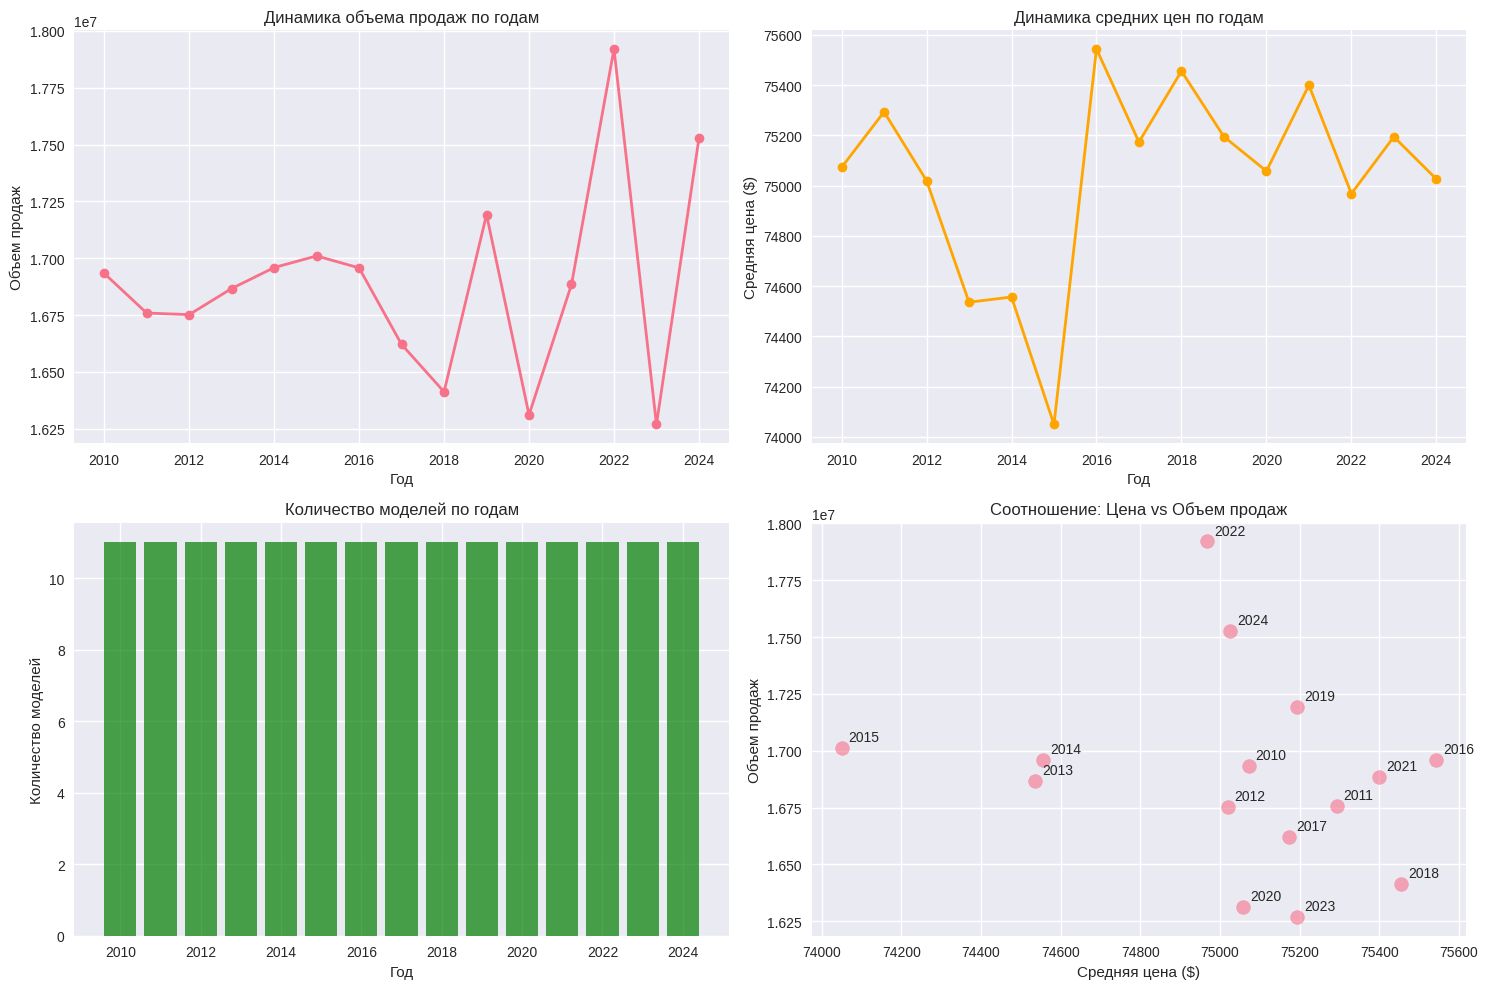

In [18]:
# 📅 АНАЛИЗ ДИНАМИКИ ПО ГОДАМ
print("📅 ДИНАМИКА ПРОДАЖ И ЦЕН ПО ГОДАМ")
print("=" * 40)
import matplotlib.pyplot as plt
# Группируем по годам используя методы pandas
yearly_analysis = df_clean.groupby('Year').agg({
    'Sales_Volume': 'sum',
    'Price_USD': 'mean',
    'Model': 'nunique'
}).round(2)

print("ДИНАМИКА ПО ГОДАМ:")
display(yearly_analysis)

# Визуализация трендов
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Динамика продаж
axes[0, 0].plot(yearly_analysis.index, yearly_analysis['Sales_Volume'], marker='o', linewidth=2)
axes[0, 0].set_title('Динамика объема продаж по годам')
axes[0, 0].set_xlabel('Год')
axes[0, 0].set_ylabel('Объем продаж')
axes[0, 0].grid(True)

# 2. Динамика цен
axes[0, 1].plot(yearly_analysis.index, yearly_analysis['Price_USD'], marker='o', color='orange', linewidth=2)
axes[0, 1].set_title('Динамика средних цен по годам')
axes[0, 1].set_xlabel('Год')
axes[0, 1].set_ylabel('Средняя цена ($)')
axes[0, 1].grid(True)

# 3. Количество моделей по годам
axes[1, 0].bar(yearly_analysis.index, yearly_analysis['Model'], color='green', alpha=0.7)
axes[1, 0].set_title('Количество моделей по годам')
axes[1, 0].set_xlabel('Год')
axes[1, 0].set_ylabel('Количество моделей')

# 4. Соотношение цена/продажи
axes[1, 1].scatter(yearly_analysis['Price_USD'], yearly_analysis['Sales_Volume'], s=100, alpha=0.6)
axes[1, 1].set_title('Соотношение: Цена vs Объем продаж')
axes[1, 1].set_xlabel('Средняя цена ($)')
axes[1, 1].set_ylabel('Объем продаж')

# Добавляем аннотации с годами
for i, year in enumerate(yearly_analysis.index):
    axes[1, 1].annotate(year, 
                       (yearly_analysis['Price_USD'].iloc[i], yearly_analysis['Sales_Volume'].iloc[i]),
                       xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

⚙️ АНАЛИЗ ТЕХНИЧЕСКИХ ХАРАКТЕРИСТИК
АНАЛИЗ ПО ТИПУ ТОПЛИВА:


,Sales_Volume,Price_USD,Model
Fuel_Type,,,
Hybrid,64532097,74797.55,12716
Petrol,63324154,74990.42,12550
Electric,63157665,75276.31,12471
Diesel,62361818,75079.81,12263



АНАЛИЗ ПО ТИПУ ТРАНСМИССИИ:


,Sales_Volume,Price_USD
Transmission,,
Manual,127362077,74899.47
Automatic,126013657,75171.41


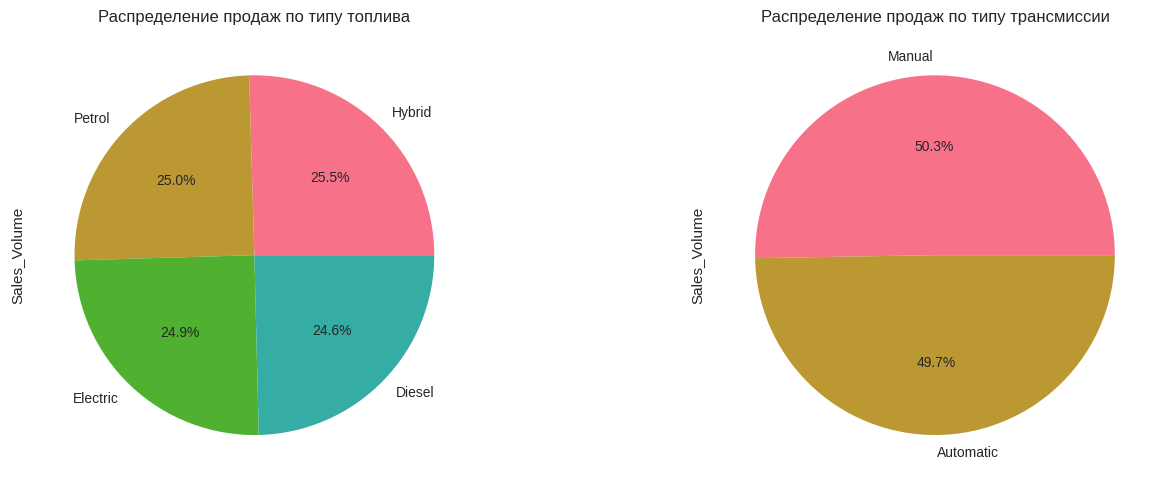

In [19]:
# ⚙️ АНАЛИЗ ТЕХНИЧЕСКИХ ХАРАКТЕРИСТИК
print("⚙️ АНАЛИЗ ТЕХНИЧЕСКИХ ХАРАКТЕРИСТИК")
print("=" * 40)
import matplotlib.pyplot as plt
# Анализ по типу топлива
fuel_analysis = df_clean.groupby('Fuel_Type').agg({
    'Sales_Volume': 'sum',
    'Price_USD': 'mean',
    'Model': 'count'
}).round(2).sort_values('Sales_Volume', ascending=False)

print("АНАЛИЗ ПО ТИПУ ТОПЛИВА:")
display(fuel_analysis)

# Анализ по трансмиссии
transmission_analysis = df_clean.groupby('Transmission').agg({
    'Sales_Volume': 'sum',
    'Price_USD': 'mean'
}).round(2).sort_values('Sales_Volume', ascending=False)

print("\nАНАЛИЗ ПО ТИПУ ТРАНСМИССИИ:")
display(transmission_analysis)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Тип топлива
fuel_analysis['Sales_Volume'].plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title('Распределение продаж по типу топлива')

# Трансмиссия
transmission_analysis['Sales_Volume'].plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
axes[1].set_title('Распределение продаж по типу трансмиссии')

plt.tight_layout()
plt.show()

🎨 АНАЛИЗ ПРЕДПОЧТЕНИЙ ПО ЦВЕТАМ
ПРЕДПОЧТЕНИЯ ПО ЦВЕТАМ:


,Sales_Volume,Price_USD
Color,,
Red,42750183,74896.45
Silver,42674022,74894.07
White,42272954,75410.57
Grey,41995141,74601.86
Blue,41972741,75427.28
Black,41710693,74984.90


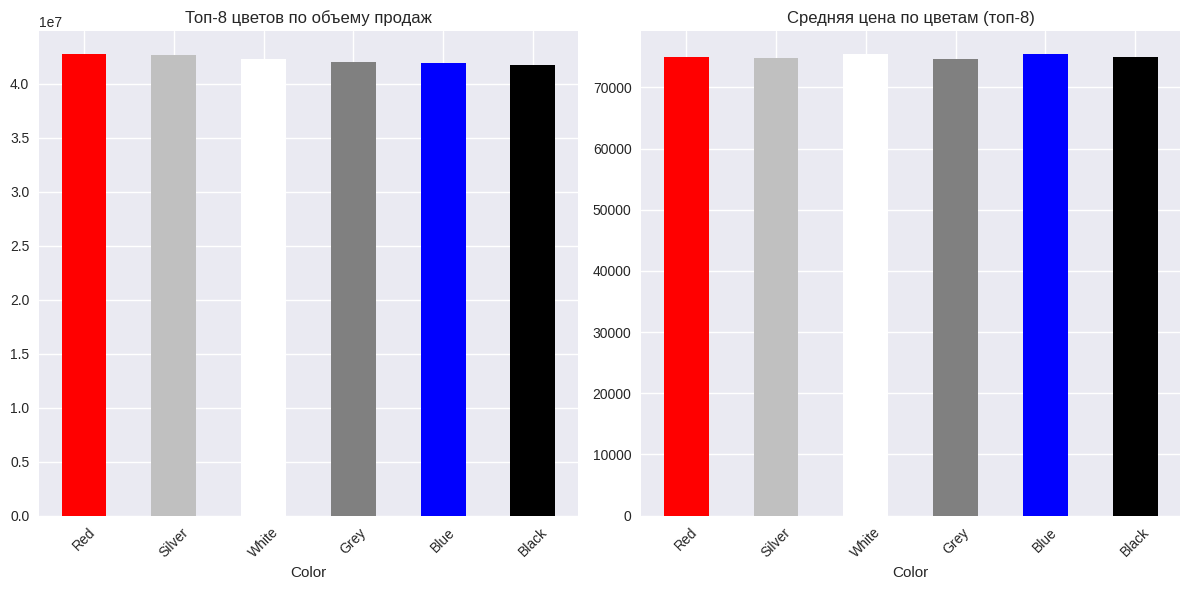

In [20]:
# 🎨 АНАЛИЗ ЦВЕТОВ
print("🎨 АНАЛИЗ ПРЕДПОЧТЕНИЙ ПО ЦВЕТАМ")
print("=" * 35)
import matplotlib.pyplot as plt
color_analysis = df_clean.groupby('Color').agg({
    'Sales_Volume': 'sum',
    'Price_USD': 'mean'
}).round(2).sort_values('Sales_Volume', ascending=False)

print("ПРЕДПОЧТЕНИЯ ПО ЦВЕТАМ:")
display(color_analysis)

# Визуализация
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
color_analysis['Sales_Volume'].head(8).plot(kind='bar', color=color_analysis.index)
plt.title('Топ-8 цветов по объему продаж')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
color_analysis['Price_USD'].head(8).plot(kind='bar', color=color_analysis.index)
plt.title('Средняя цена по цветам (топ-8)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [21]:
# 💎 ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ
print("💎 ОСНОВНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("=" * 45)

# Используем методы CarSalesAnalysis для финального анализа
top_models_final = analyzer_clean.sales_by_model(5)
regions_final = analyzer_clean.regional_analysis()

print("🎯 КЛЮЧЕВЫЕ ИНСАЙТЫ:")
print(f"• Топ-1 модель: {top_models_final.index[0]} ({top_models_final.iloc[0]['Sales_Volume']} продаж)")
print(f"• Самый прибыльный регион: {regions_final['Price_USD'].idxmax()} (${regions_final['Price_USD'].max():,.2f})")
print(f"• Всего продаж за период: {df_clean['Sales_Volume'].sum():,} единиц")
print(f"• Средняя цена по рынку: ${df_clean['Price_USD'].mean():,.2f}")
print(f"• Покрытие данных: {df_clean['Year'].min()}-{df_clean['Year'].max()} годы")

print("\n📈 СТРАТЕГИЧЕСКИЕ РЕКОМЕНДАЦИИ:")
print("1. 📊 Усилить маркетинг топовых моделей в высокоприбыльных регионах")
print("2. 💰 Проанализировать ценообразование для оптимизации маржи")
print("3. 🌍 Исследовать потенциал роста в регионах с низким охватом")
print("4. 🚗 Развивать модели с лучшим соотношением цена/качество")
print("5. 📅 Мониторить сезонные колебания спроса")

print("\n🔮 ПЕРСПЕКТИВЫ ДАЛЬНЕЙШЕГО АНАЛИЗА:")
print("• Прогнозирование продаж на основе исторических данных")
print("• Сегментация клиентов по предпочтениям")
print("• Анализ конкурентной среды")
print("• Оптимизация складских запасов")

print("\n✅ АНАЛИЗ ЗАВЕРШЕН!")
print("=" * 45)

💎 ОСНОВНЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ
🎯 КЛЮЧЕВЫЕ ИНСАЙТЫ:
• Топ-1 модель: 7 Series (23786466.0 продаж)
• Самый прибыльный регион: Asia ($75,554.93)
• Всего продаж за период: 253,375,734 единиц
• Средняя цена по рынку: $75,034.60
• Покрытие данных: 2010-2024 годы

📈 СТРАТЕГИЧЕСКИЕ РЕКОМЕНДАЦИИ:
1. 📊 Усилить маркетинг топовых моделей в высокоприбыльных регионах
2. 💰 Проанализировать ценообразование для оптимизации маржи
3. 🌍 Исследовать потенциал роста в регионах с низким охватом
4. 🚗 Развивать модели с лучшим соотношением цена/качество
5. 📅 Мониторить сезонные колебания спроса

🔮 ПЕРСПЕКТИВЫ ДАЛЬНЕЙШЕГО АНАЛИЗА:
• Прогнозирование продаж на основе исторических данных
• Сегментация клиентов по предпочтениям
• Анализ конкурентной среды
• Оптимизация складских запасов

✅ АНАЛИЗ ЗАВЕРШЕН!
